In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['iwildcam-2019-fgvc6', 'reshape32x32']


In [2]:
train= pd.read_csv("../input/iwildcam-2019-fgvc6/train.csv")
test= pd.read_csv("../input/iwildcam-2019-fgvc6/test.csv")
sample_submission= pd.read_csv("../input/iwildcam-2019-fgvc6/sample_submission.csv")
print("train.shape:", train.shape)
print("test.shape:", test.shape)
print("sample_submmission.shape:", sample_submission.shape)

train_images = '../input/train_images/*'
test_images = '../input/test_images/*'

train.shape: (196299, 11)
test.shape: (153730, 10)
sample_submmission.shape: (153730, 2)


In [3]:
import cv2
import glob
import matplotlib.pyplot as plt
import tqdm
import tensorflow as tf
from tensorflow.python.framework import ops
import scipy
from scipy import ndimage
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from PIL import Image

In [4]:
train.head()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [5]:
test.head()

,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,2016-01-03 11:30:56,bce932f6-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bce932f6-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
1,2016-01-03 11:30:57,bce932f7-2bf6-11e9-bcad-06f10d5896c4.jpg,2,bce932f7-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
2,2016-01-03 11:30:58,bce932f8-2bf6-11e9-bcad-06f10d5896c4.jpg,3,bce932f8-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
3,2016-01-03 11:30:59,bce932f9-2bf6-11e9-bcad-06f10d5896c4.jpg,4,bce932f9-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
4,2016-01-03 11:31:00,bce932fa-2bf6-11e9-bcad-06f10d5896c4.jpg,5,bce932fa-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726


0     131457
19     14106
13      8623
11      7209
8       6938
1       6102
16      5975
17      4759
3       3398
18      3035
4       2210
14      1361
10      1093
22        33
Name: category_id, dtype: int64

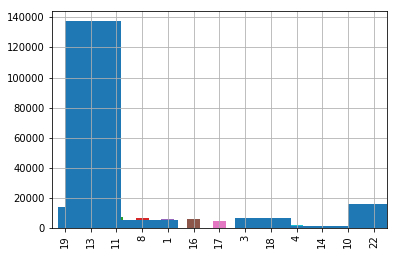

In [6]:
sample_submission.head()

train['category_id'].value_counts()[1:16].plot(kind='bar')

train.category_id.hist()
train.category_id.value_counts()



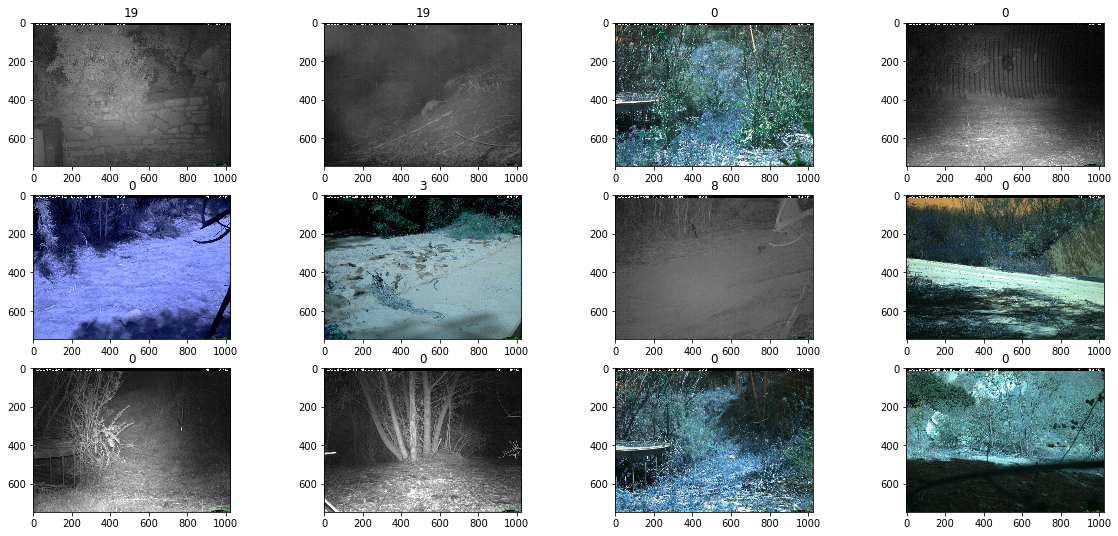

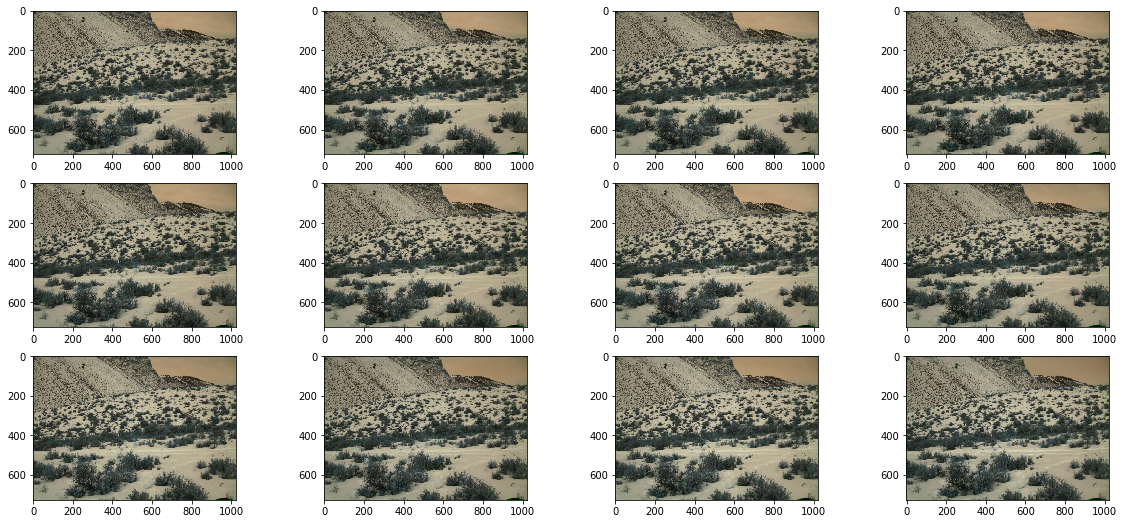

In [7]:
def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 3*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'file_name']
        image_id = df.loc[i,'category_id']
        img = cv2.imread(f'../input/iwildcam-2019-fgvc6/train_images/{image_path}')
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
display_samples(train)

def display_test(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 3*rows))

    for i in range (columns*rows):
        image_path = df.loc[i,'file_name']
        #image_id = df.loc[i,'category_id']
        img = cv2.imread(f'../input/iwildcam-2019-fgvc6/test_images/{image_path}')
        fig.add_subplot(rows, columns, i+1)
        #plt.title(image_id)
        plt.imshow(img)

display_test(test)



In [8]:
# Get ids and labels
train_id = train['file_name']
labels = train['category_id']
test_id = sample_submission['Id']

img = plt.imread('../input/iwildcam-2019-fgvc6/train_images/'+ train['file_name'][0])
img.shape



(747, 1024, 3)